# Non-Positional Encodings for Third Variables
> - Shape for ```quali```tative data, especially good for nominal.
- Size for ```quanti```tative data, mapping between variable value and size shouldn't be distorted.
- Color for ```quali```tative and ```quanti```tative data.

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fuel_df = pd.read_csv('./fuel-econ.csv')
poke_df = pd.read_csv('./pokemon.csv')

In [2]:
fuel_df.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


In [3]:
poke_df.head(3)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100


### Shape - Engine size vs. Fuel eff. vs. Transmission type 
> two numeric variables and one categorical variable

#### How to code
```python
cat_markers = [['A', 'o'],
               ['B', 's']]

for cat, marker in cat_markers:
    df_cat = df[df['cat_var1'] == cat]
    # plt.scatter or sns.regplot
    plt.scatter(data = df_cat, x = 'num_var1', y = 'num_var2', marker = marker)
plt.legend(['A','B'])
```

In [4]:
# Add a column for only two types of transmisson
fuel_df['trans_type'] = fuel_df.trans.apply(lambda x: x.split()[0])
fuel_df['trans_type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [5]:
# sample fewer data to prevent overlapping
np.random.seed(42)
sample = np.random.choice(fuel_df.shape[0], 200, replace=False)
fuel_df_subset = fuel_df.loc[sample]

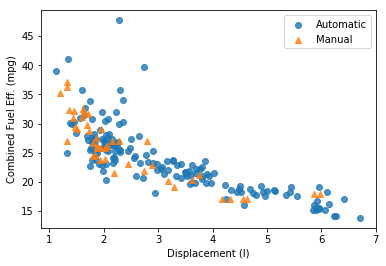

In [6]:
ttype_marker = [['Automatic', 'o'],
              ['Manual', '^']]

for ttype, marker in ttype_marker:
    plot_data = fuel_df_subset[fuel_df_subset.trans_type == ttype]
    sns.regplot(data=plot_data, x='displ', y='comb', 
                x_jitter=0.3, 
                fit_reg=False,
                marker=marker)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual']);

### Size - Engine size vs. Fuel eff. vs. CO2 emission
> three numeric variables
#### How to code
```python
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', s = 'num_var3')

# dummy series for adding legend
sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
```

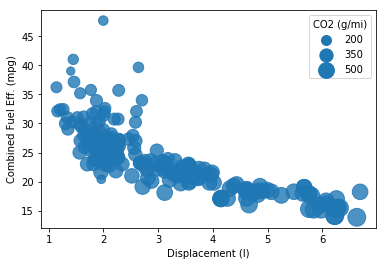

In [7]:
sns.regplot(data=fuel_df_subset, x='displ', y='comb',
            x_jitter=0.3, 
            fit_reg=False,
            scatter_kws={'s': fuel_df_subset['co2']/2}); # /2 for smaller marker size
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# dummy scatter plot sequences for legend
sizes = [200, 350, 500]
base_color = sns.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[], s=s/2, color=base_color))
plt.legend(legend_obj, sizes, title='CO2 (g/mi)');

### Color
- Qualitative Palette: Good for nominal data.
<img src='https://seaborn.pydata.org/_images/color_palettes_6_0.png'>
- Sequential Palette: Good for ordinal and numeric data.
<img src='https://seaborn.pydata.org/_images/color_palettes_25_0.png'>
- Diverging Palette: Good for ordinal and numeric data with a meaningful center point.
<img src='https://seaborn.pydata.org/_images/color_palettes_55_0.png'>

See [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) for more.

**Be mindful for color blindness**

### Engine size vs. Fuel eff. vs. Transmission type
> Using Qualitative Palette

#### How to code
```python
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5)
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()
```

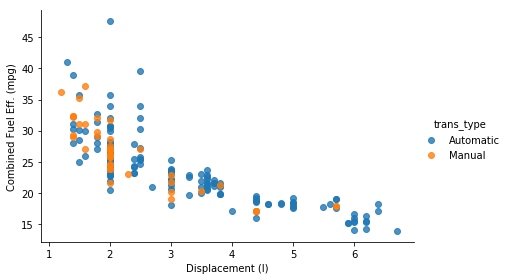

In [8]:
g = sns.FacetGrid(data=fuel_df_subset, hue='trans_type',
                  hue_order=['Automatic', 'Manual'], # Choose which data on top
                  height=4, aspect=1.5) # set figure size
g = g.map(sns.regplot, 'displ', 'comb', fit_reg=False)
g.add_legend()

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Engine size vs. Fuel eff. vs. Car size
> Using Sequential Palette

In [9]:
# convert VClass to order categorical type
sedan_cars = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
classes = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_cars)
fuel_df_subset['VClass'] = fuel_df_subset['VClass'].astype(classes)

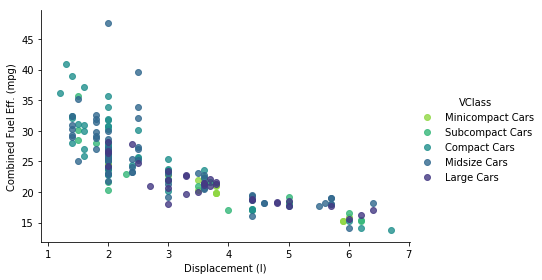

In [10]:
g = sns.FacetGrid(data=fuel_df_subset, hue='VClass',
                  palette = 'viridis_r', # Sequential Palette
                  height=4, aspect=1.5) # set figure size
g = g.map(sns.regplot, 'displ', 'comb', fit_reg=False)
g.add_legend()

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Size - Engine size vs. Fuel eff. vs. CO2 emission
> Using Sequential Palette

#### How to code
```python
plt.scatter(data = df, x = 'num_var1', y = 'num_var2', c = 'num_var3')
plt.colorbar()
```

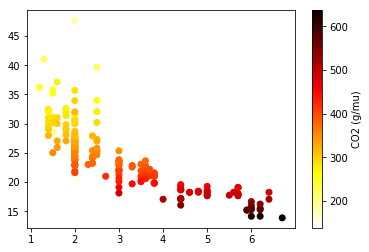

In [11]:
# Using FacetGrid will create a messy, long legend
plt.scatter(data=fuel_df_subset, x='displ', y='comb', c='co2', cmap='hot_r')
plt.colorbar(label='CO2 (g/mu)');

### Further Reading
- Eager Eyes: [How The Rainbow Color Map Misleads](https://eagereyes.org/basics/rainbow-color-map) - seaborn will refuse to accept the 'jet' palette string, which corresponds with a rainbow-colored palette that covers the entire range of hues. This, and the next link, will tell you why it's been forbidden.
- Agile Scientific: [No more rainbows!](https://agilescientific.com/blog/2017/12/14/no-more-rainbows)
- Datawrapper: [How to Choose a Color Palette for Choropleth Maps](https://blog.datawrapper.de/how-to-choose-a-color-palette-for-choropleth-maps/) - Though this article discusses color in the context of maps and for a specific software tool, it's a useful reference if you want to create a non-linear normalization function.- 